In [4]:
import numpy as np
import matplotlib.pyplot as plt
from models.approximator import LinearApproximator
from models.approximator import RBFApproximator
from systems.system import TrainableDynamicalSystem
from systems.system import GridSearchDynamicalSystem
from models.utils import compute_mse
from models.utils import grid_search
from systems.utils import load_vectorfield

In [5]:
# loading vector data
x0, x1 = load_vectorfield('../data/vector_field_nonlinear.txt')

### 1. Estimate the Vector Field Describing $\psi$ using a linear operator $A$.

The linear operator $A$ is defined as: $A \in \mathbb{R}^{2 \times 2}$. Then compute mean squared error.

In [6]:
linear_approximator = LinearApproximator(rcond=1e-6)
delta_t = 0.01
linear_system = TrainableDynamicalSystem(approximator=linear_approximator)

# Train linear model
linear_system.fit(x0, x1, delta_t=delta_t)

# Extract learned matrix in linear approximator
learned_A = linear_system.approximator._weights
print("learned linear matrix:")
print(learned_A)

# Simulate from all initial points
x1_predicted = linear_system.batch_simulate(x0, delta_t, n_evals=None)

# Compute mean squared error
mse = compute_mse(x1, x1_predicted)

print(f"Mean squared error: \n{mse:.6f}")

learned linear matrix:
[[-1.0016012   0.08672716]
 [-0.02534942 -4.32671381]]
Mean squared error: 
0.037276


### 2. Approximate the vector field using radial basis functions

And compute mean squared error.

Training rbf model
Training complete
L=500, eps=0.5  -> MSE = 0.001008
Training rbf model
Training complete
L=500, eps=1.0  -> MSE = 0.000844
Training rbf model
Training complete
L=500, eps=2.0  -> MSE = 0.000840
Training rbf model
Training complete
L=500, eps=3.0  -> MSE = 0.000841
Training rbf model
Training complete
L=500, eps=4.0  -> MSE = 0.000837
Training rbf model
Training complete
L=500, eps=5.0  -> MSE = 0.000814
Training rbf model
Training complete
L=500, eps=6.0  -> MSE = 0.000827
Training rbf model
Training complete
L=500, eps=7.0  -> MSE = 0.000826
Training rbf model
Training complete
L=500, eps=10.0 -> MSE = 0.000839
Training rbf model
Training complete
L=500, eps=20.0 -> MSE = 0.000932


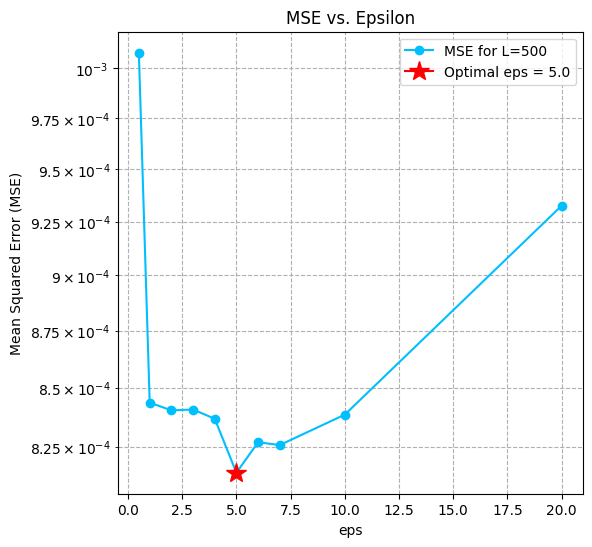


for L=500，best Epsilon found: 5.0


In [24]:
L = 500
eps_list = [0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 10.0, 20.0]
mse_results = []

for eps in eps_list:
    rbf_approximator = RBFApproximator(L=L, eps=eps, rcond=1e-6)
    delta_t = 0.01
    rbf_system = TrainableDynamicalSystem(approximator=rbf_approximator)

    # Train rbf model
    print("Training rbf model")
    rbf_system.fit(x0, x1, delta_t=delta_t)
    print("Training complete")

    # Extract learned matrix in rbf approximator
    learned_A = rbf_system.approximator._weights

    # Simulate from all initial points
    x1_predicted = rbf_system.batch_simulate(x0, delta_t, n_evals=None)

    # Compute mean squared error
    mse = compute_mse(x1, x1_predicted)

    mse_results.append(mse)
    print(f"L={L}, eps={eps:<4} -> MSE = {mse:.6f}")

plt.figure(figsize=(6, 6))
plt.plot(eps_list, mse_results, 'o-',color='Deepskyblue', label=f'MSE for L={L}')
plt.title('MSE vs. Epsilon')
plt.xlabel('eps')
plt.ylabel('Mean Squared Error (MSE)')
plt.yscale('log')

min_mse = np.min(mse_results)
best_eps = eps_list[np.argmin(mse_results)]

# Mark the minimum
plt.plot(best_eps, min_mse,
         marker='*',
         markersize=15,
         color='red',
         label=f'Optimal eps = {best_eps}')

plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

best_eps_index = np.argmin(mse_results)
best_eps = eps_list[best_eps_index]
print(f"\nfor L={L}，best Epsilon found: {best_eps}")

L=100, eps=5.0 -> MSE = 0.000813
L=200, eps=5.0 -> MSE = 0.000814
L=300, eps=5.0 -> MSE = 0.000814
L=400, eps=5.0 -> MSE = 0.000814
L=500, eps=5.0 -> MSE = 0.000814
L=600, eps=5.0 -> MSE = 0.000814
L=700, eps=5.0 -> MSE = 0.000814
L=800, eps=5.0 -> MSE = 0.000814
L=900, eps=5.0 -> MSE = 0.000814
L=1000, eps=5.0 -> MSE = 0.000814


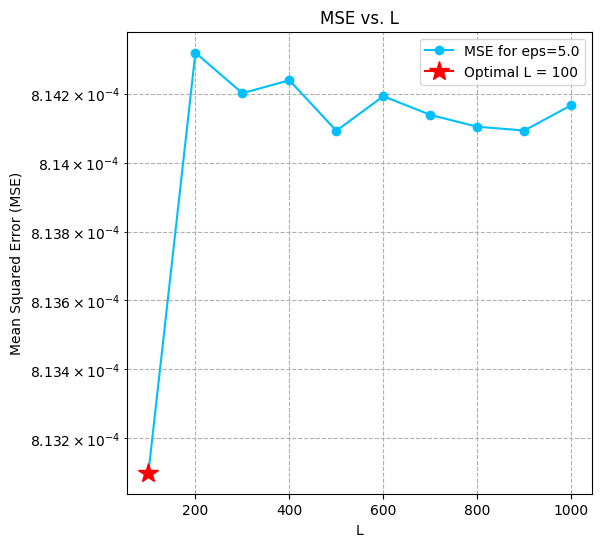


for eps=5.0，best L found: 100


In [27]:
eps = 5.0
L_list = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
mse_results = []

for L in L_list:
    rbf_approximator = RBFApproximator(L=L, eps=eps, rcond=1e-6)
    delta_t = 0.01
    rbf_system = TrainableDynamicalSystem(approximator=rbf_approximator)

    # Train rbf model
    rbf_system.fit(x0, x1, delta_t=delta_t)

    # Extract learned matrix in rbf approximator
    learned_A = rbf_system.approximator._weights

    # Simulate from all initial points
    x1_predicted = rbf_system.batch_simulate(x0, delta_t, n_evals=None)

    # Compute mean squared error
    mse = compute_mse(x1, x1_predicted)

    mse_results.append(mse)
    print(f"L={L}, eps={eps} -> MSE = {mse:.6f}")

plt.figure(figsize=(6, 6))
plt.plot(L_list, mse_results, 'o-', color='Deepskyblue', label=f'MSE for eps={5.0}')
plt.title('MSE vs. L')
plt.xlabel('L')
plt.ylabel('Mean Squared Error (MSE)')
# plt.xscale('log')
plt.yscale('log')


best_L_index = np.argmin(mse_results)
best_L = L_list[best_L_index]
min_mse = np.min(mse_results)
# Mark the minimum
plt.plot(best_L, min_mse,
         marker='*',
         markersize=15,
         color='red',
         label=f'Optimal L = {best_L}')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

best_L_index = np.argmin(mse_results)
best_L = L_list[best_L_index]
print(f"\nfor eps={eps}，best L found: {best_L}")

In [9]:
# This is a dictionary where keys are the parameter names
# and values are the lists of values to try.
param_grid = {
    'L': [100, 200, 400, 600],
    'eps': [1.0, 2.0, 5.0, 10.0]
}

# --- 3. Create the base model to be tuned ---
# We need to use the GridSearchDynamicalSystem wrapper.
# It takes the approximator class and delta_t as arguments.
# We don't specify L or eps here, as GridSearchCV will set them.
model_to_tune = GridSearchDynamicalSystem(
    delta_t=0.01,
    approximator_cls=RBFApproximator,
    rcond=1e-6  # We can pass fixed parameters here
)

# --- 4. Call the grid_search function ---
print("Starting automated grid search with cross-validation...")
# The data tuple for this wrapper is (x0, x1)
cv_results = grid_search(
    parameters=param_grid,
    model=model_to_tune,
    data=(x0, x1),.0
    scoring="neg_mean_squared_error",
    n_splits=5  # Use 5-fold cross-validation
)
print("\nGrid search complete!")

# --- 5. Extract and print the best results ---
best_params = cv_results.best_params_
# The score will be negative MSE, so we multiply by -1 to get the actual MSE
best_mse = -cv_results.best_score_
# The best_estimator_ is a fitted model with the best found parameters
best_model = cv_results.best_estimator_

print("\n--- GridSearchCV Best Results ---")
print(f"Best parameters found: {best_params}")
print(f"Best cross-validated MSE: {best_mse:.8f}")

Starting automated grid search with cross-validation...
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Grid search complete!

--- GridSearchCV Best Results ---
Best parameters found: {'L': 100, 'eps': 5.0}
Best cross-validated MSE: 0.00040741


### 3. System Data Analysis
Now, using our best-performing RBF model with optimal hyper-parameters, we investigate the long-term dynamics of the system.


Identified 4 attracting steady states at coordinates:
[[-2.81384448  3.13532779]
 [ 2.99973652  2.02349554]
 [-3.77251131 -3.27552785]
 [ 3.57698343 -1.8471811 ]]


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


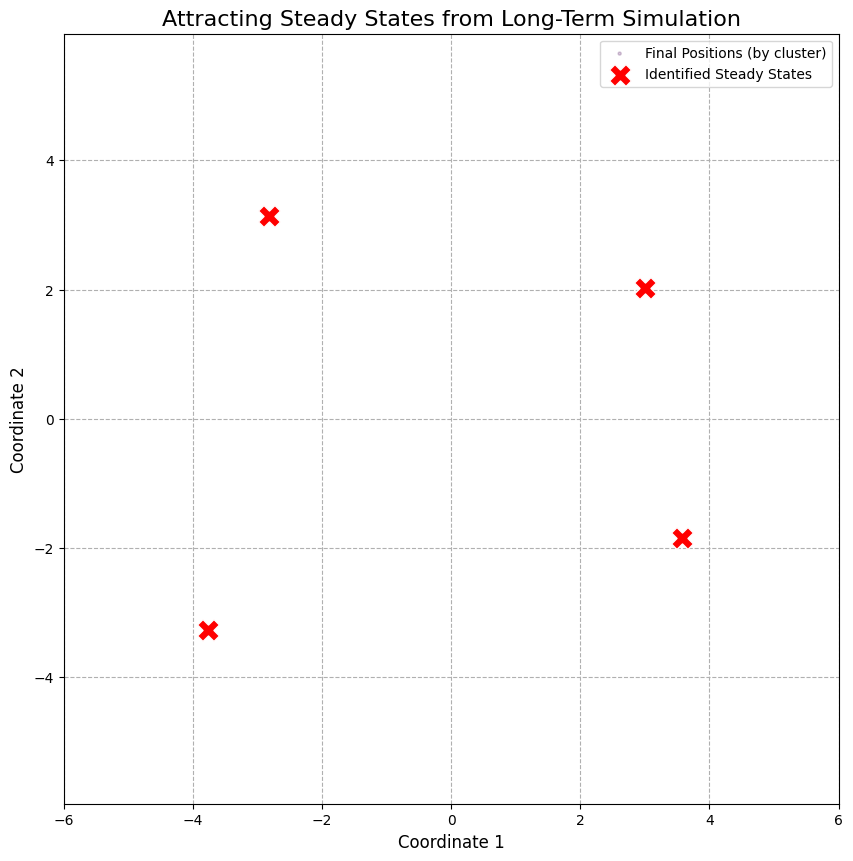

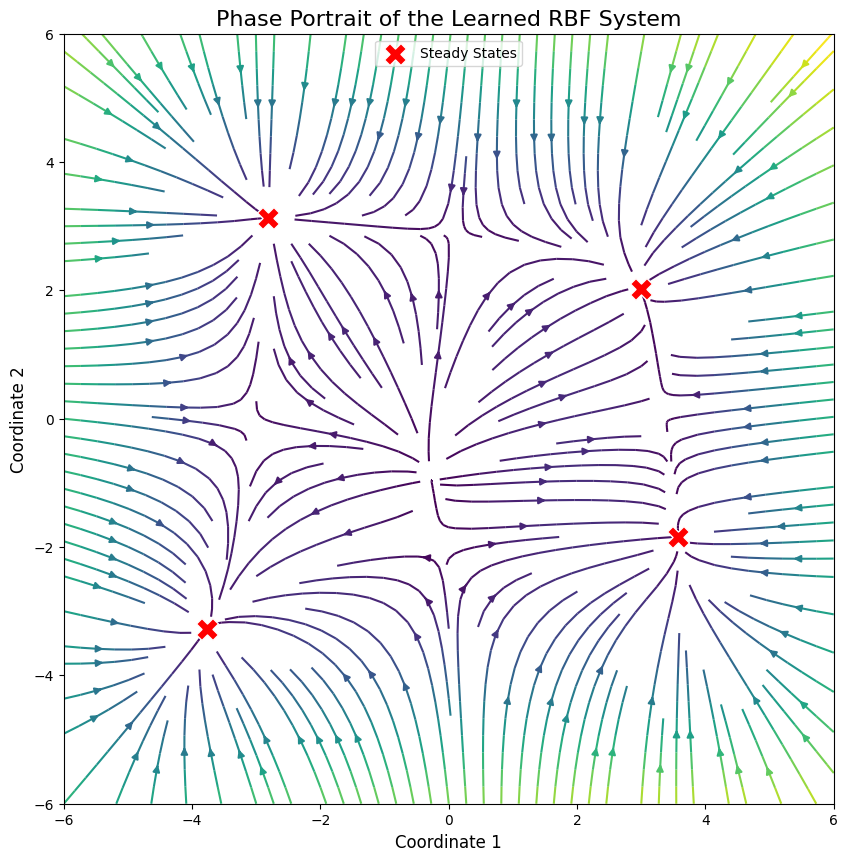

In [30]:
from sklearn.cluster import KMeans
import time

final_rbf_system = best_model.system

# Run long term simulation
T_end = 100
start_time = time.time()

# n_evals=None makes simulate() return only the final positions at t_max
final_positions = final_rbf_system.batch_simulate(x0, t_max=T_end, n_evals=None)

# Use KMeans Clustering with 4 attractors (<10)
num_attractors = 4
kmeans = KMeans(n_clusters=num_attractors, random_state=42, n_init='auto')
kmeans.fit(final_positions)
steady_states = kmeans.cluster_centers_

print(f"\nIdentified {len(steady_states)} attracting steady states at coordinates:")
print(steady_states)

# Prepare Grid for Phase Portrait
x_min, x_max = -6, 6
y_min, y_max = -6, 6
grid_points_x, grid_points_y = np.meshgrid(
    np.linspace(x_min, x_max, 30),
    np.linspace(y_min, y_max, 30)
)
grid_to_predict = np.vstack([grid_points_x.ravel(), grid_points_y.ravel()]).T

# Predict the velocities on the grid using the learned model
# The .predict() method of the approximator gives us the vector field v = f(x)
velocities_grid = final_rbf_system.approximator.predict(grid_to_predict)
vel_x = velocities_grid[:, 0].reshape(grid_points_x.shape)
vel_y = velocities_grid[:, 1].reshape(grid_points_y.shape)

# Plot of final positions to show the attractors
plt.figure(figsize=(10, 10))

plt.scatter(final_positions[:, 0], final_positions[:, 1],
            s=5, alpha=0.2, c=kmeans.labels_, cmap='viridis',
            label='Final Positions (by cluster)')

plt.scatter(steady_states[:, 0], steady_states[:, 1],
            s=250, c='red', marker='X', edgecolors='white',
            zorder=5, label='Identified Steady States')

plt.title('Attracting Steady States from Long-Term Simulation', fontsize=16)
plt.xlabel('Coordinate 1', fontsize=12)
plt.ylabel('Coordinate 2', fontsize=12)
plt.legend()
plt.axis('equal')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.grid(True, linestyle='--')

# Second phase portrait plot
plt.figure(figsize=(10, 10))

magnitude = np.sqrt(vel_x**2 + vel_y**2)
plt.streamplot(grid_points_x, grid_points_y, vel_x, vel_y,
               density=1.5,
               color=magnitude,
               cmap='viridis')

plt.scatter(steady_states[:, 0], steady_states[:, 1],
            s=250, c='red', marker='X', edgecolors='white',
            zorder=5, label='Steady States')

plt.title('Phase Portrait of the Learned RBF System', fontsize=16)
plt.xlabel('Coordinate 1', fontsize=12)
plt.ylabel('Coordinate 2', fontsize=12)
plt.legend()
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.gca().set_aspect('equal', adjustable='box') # gca() gets current axes
plt.show()